# 🌞 Solar Weather Prediction Project
Welcome to the starter notebook for predicting solar irradiance using weather data.

## 🧠 Problem Definition
Define the problem and objective of this project.
- Goal: Predict solar irradiance for Karachi using past weather data
- Use: Help solar companies forecast energy output

## 📥 Data Collection
We'll use the Meteostat API to fetch historical weather data for Karachi.

In [5]:
# Import essential libraries
import pandas as pd

# Define the dataset path (your path)
file_path = r"C:\Users\Fayaz Ahmed Malik\OneDrive\Desktop\Solar_Power_Prediction_Project\data\solar_weather.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Show top 5 rows
print("🔹 First 5 rows:")
display(df.head())

# Dataset shape
print(f"\n🔹 Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Data types
print("\n🔹 Data types and non-null counts:")
display(df.info())

# Summary statistics
print("\n🔹 Summary statistics:")
display(df.describe())

# Missing values
print("\n🔹 Missing values per column:")
display(df.isnull().sum())

🔹 First 5 rows:


,Date,Temperature,Humidity,Wind_Speed,Cloud_Cover,UV_Index,Power_Output
0,1/1/2024,34.5,51.3,11.0,42.5,7.4,1738.9
1,1/2/2024,31.3,36.4,13.1,13.1,4.9,1515.8
2,1/3/2024,35.2,34.3,9.8,37.9,5.4,1511.9
3,1/4/2024,39.6,49.8,10.8,51.6,7.9,1849.9
4,1/5/2024,30.8,42.8,11.4,0.0,7.2,1849.9



🔹 Dataset contains 180 rows and 7 columns.

🔹 Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          180 non-null    object 
 1   Temperature   180 non-null    float64
 2   Humidity      180 non-null    float64
 3   Wind_Speed    180 non-null    float64
 4   Cloud_Cover   180 non-null    float64
 5   UV_Index      180 non-null    float64
 6   Power_Output  180 non-null    float64
dtypes: float64(6), object(1)
memory usage: 10.0+ KB


None


🔹 Summary statistics:


,Temperature,Humidity,Wind_Speed,Cloud_Cover,UV_Index,Power_Output
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,31.891111,45.253333,9.902222,30.249444,7.160000,1730.981111
std,4.750575,9.516551,2.047125,14.936171,1.144264,167.805787
min,18.900000,12.600000,5.400000,0.000000,4.800000,1217.200000
25%,28.600000,38.475000,8.400000,21.800000,6.300000,1614.825000
50%,31.950000,45.600000,9.900000,29.550000,7.200000,1728.900000
75%,34.625000,51.300000,11.225000,40.475000,7.800000,1848.475000
max,45.600000,83.500000,16.200000,68.600000,10.200000,2226.800000



🔹 Missing values per column:


Date            0
Temperature     0
Humidity        0
Wind_Speed      0
Cloud_Cover     0
UV_Index        0
Power_Output    0
dtype: int64

## 🧹 Data Cleaning
Clean null values, format dates, and prepare the data.

In [7]:
# Check missing values again
print("Missing values before cleaning:")
print(df.isnull().sum())

# 1. Drop duplicate rows agar ho to
df = df.drop_duplicates()

# 2. Fill or drop missing values (example: fill numeric columns with median)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    median = df[col].median()
    df[col] = df[col].fillna(median)


# 3. Convert date/time columns to datetime (agar ho)
# Example: agar column name 'Date' hai
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 4. Drop rows with any remaining missing values (optional)
df.dropna(inplace=True)

# 5. Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Check missing values after cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Check cleaned data shape
print(f"\nDataset shape after cleaning: {df.shape}")

Missing values before cleaning:
Date            0
Temperature     0
Humidity        0
Wind_Speed      0
Cloud_Cover     0
UV_Index        0
Power_Output    0
dtype: int64

Missing values after cleaning:
Date            0
Temperature     0
Humidity        0
Wind_Speed      0
Cloud_Cover     0
UV_Index        0
Power_Output    0
dtype: int64

Dataset shape after cleaning: (180, 7)


## 📊 EDA (Exploratory Data Analysis)
Visualize trends and understand correlations.

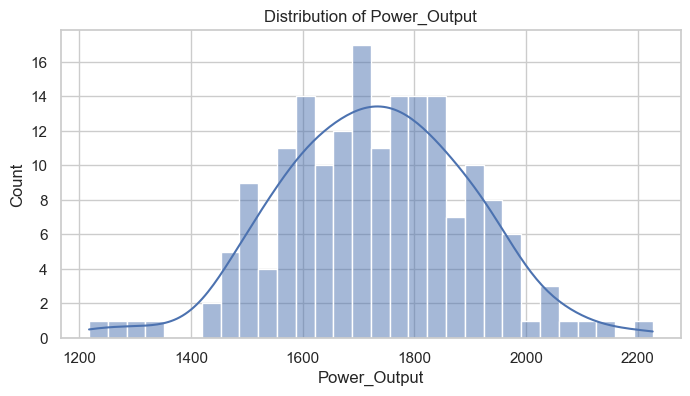

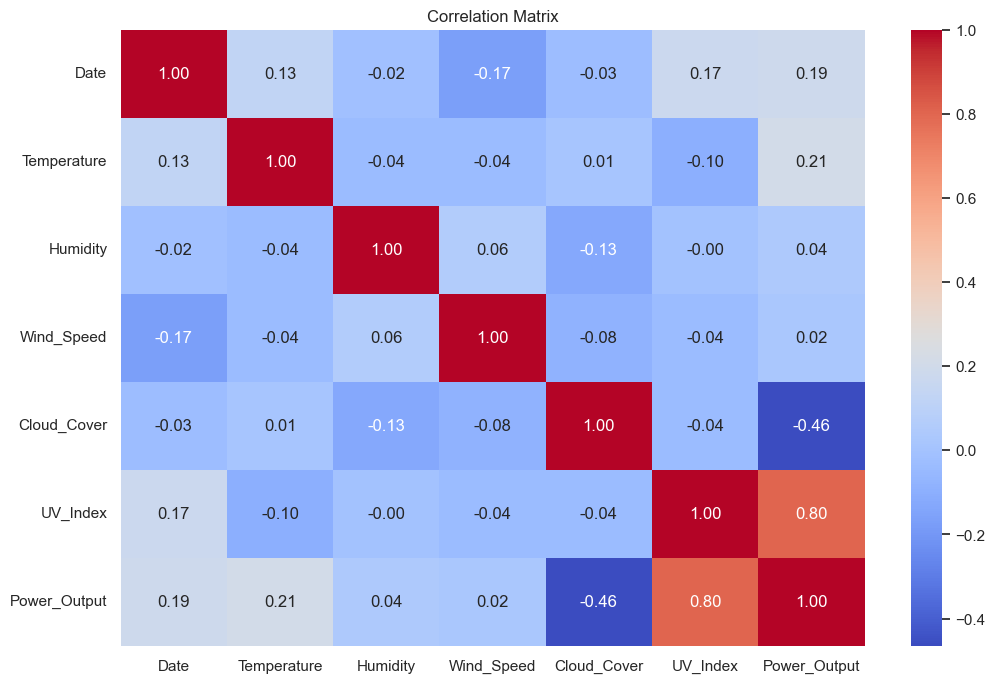

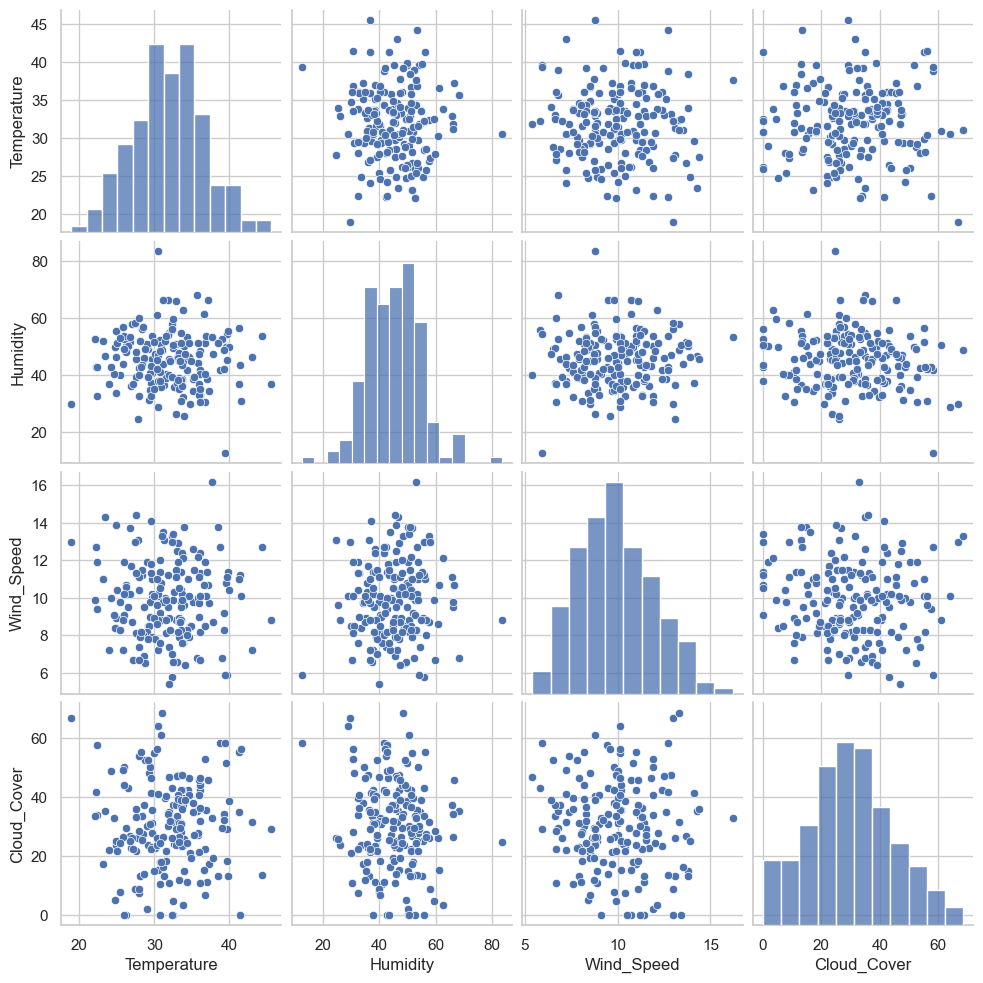

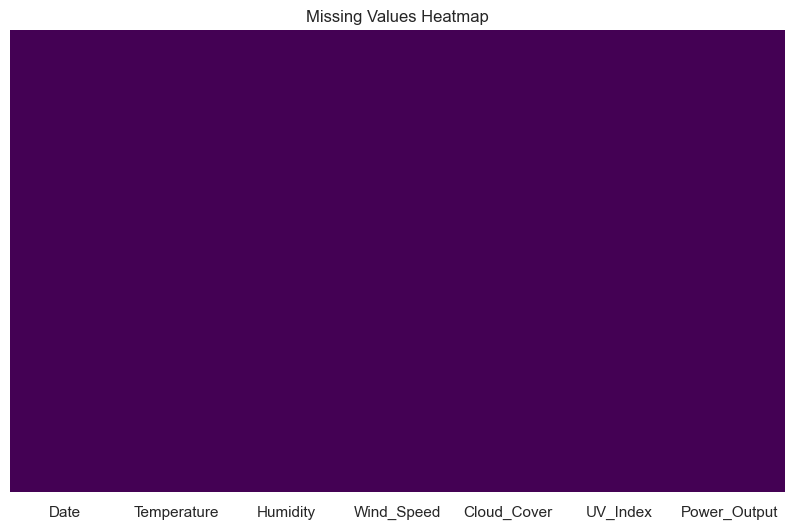

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Correct target column
target_col = 'Power_Output'

# 1. Target variable distribution
plt.figure(figsize=(8, 4))
sns.histplot(df[target_col], bins=30, kde=True)
plt.title(f'Distribution of {target_col}')
plt.show()

# 2. Correlation matrix
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 3. Pairplot for first 5 columns (adjust if needed)
features_to_plot = df.columns[:5].tolist()
sns.pairplot(df[features_to_plot])
plt.show()

# 4. Missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## 🧠 Model Training
Train a machine learning models & Check resutls

In [29]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Drop missing values if any
df = df.dropna()

# Features and target
X = df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'UV_Index']]
y = df['Power_Output']

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),  # Regularized linear regression to prevent overfitting
    "Decision Tree": DecisionTreeRegressor(random_state=42),  # Tree-based model, non-linear, interpretable
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),  # Ensemble of trees, reduces overfitting
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),  # Boosted trees, strong performance
    "Support Vector Regression": SVR(kernel='rbf')  # Kernel-based model, good for complex non-linear relations
}

# Train, predict and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    
    # Calculate error metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"{name} -> MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Linear Regression -> MAE: 38.95, RMSE: 46.60
Ridge Regression -> MAE: 38.99, RMSE: 46.65
Decision Tree -> MAE: 57.32, RMSE: 72.65
Random Forest -> MAE: 51.00, RMSE: 64.30
Gradient Boosting -> MAE: 51.28, RMSE: 66.29
Support Vector Regression -> MAE: 129.34, RMSE: 158.68


### Regression Model

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Drop missing values if any
df = df.dropna()

# Features and target
X = df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'UV_Index']]
y = df['Power_Output']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Linear Regression MAE: {mae:.2f}")
print(f"Linear Regression RMSE: {rmse:.2f}")

Linear Regression MAE: 38.95
Linear Regression RMSE: 46.60


MAE (Mean Absolute Error):
Ye average error ka size batata hai. Linear Regression mein approx 39 units error hai, Random Forest mein 51 units. Matlab Linear Regression ne zyada accurate predictions diye hain.

RMSE (Root Mean Squared Error):
Ye error ka thoda zyada sensitive metric hai, jo bade errors ko zyada penalize karta hai. Yahan bhi Linear Regression ka RMSE 46.6 hai, jo Random Forest ke 65.23 se better hai.

# let's try some more models

In [22]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Drop missing values if any
df = df.dropna()

# Features and target
X = df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'UV_Index']]
y = df['Power_Output']

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),  # Regularized linear regression to prevent overfitting
    "Decision Tree": DecisionTreeRegressor(random_state=42),  # Tree-based model, non-linear, interpretable
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),  # Ensemble of trees, reduces overfitting
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),  # Boosted trees, strong performance
    "Support Vector Regression": SVR(kernel='rbf')  # Kernel-based model, good for complex non-linear relations
}

# Train, predict and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    
    # Calculate error metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"{name} -> MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Linear Regression -> MAE: 38.95, RMSE: 46.60
Ridge Regression -> MAE: 38.99, RMSE: 46.65
Decision Tree -> MAE: 57.32, RMSE: 72.65
Random Forest -> MAE: 51.00, RMSE: 64.30
Gradient Boosting -> MAE: 51.28, RMSE: 66.29
Support Vector Regression -> MAE: 129.34, RMSE: 158.68


## Because our Model Linear Regression performed well than other models so we imporve linear regression model.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

# Drop missing values
df = df.dropna()

# Features and target
X = df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'UV_Index']]
y = df['Power_Output']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline with scaler + Ridge Regression
model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Ridge Regression with Scaling -> MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Ridge Regression with Scaling -> MAE: 38.96, RMSE: 46.67


## 💾 Save Model
Save the trained model for later use.

In [ ]:
#Hyperparameter Tuning for Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print("Best alpha:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Tuned Ridge Regression -> MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Best alpha: {'ridge__alpha': 0.1}
Tuned Ridge Regression -> MAE: 38.95, RMSE: 46.60


In [ ]:

import joblib

# Save model
joblib.dump(model, 'models/solar_model.pkl')


## 📤 Deployment (Using VS code)